In [4]:
# %%
import os
import torch
import numpy as np
import argparse
import matplotlib.pyplot as plt
from taobao_behavior_dataset import TaobaoUserClicksDataset
from ad_features_predictor import AdFeaturesPredictor
from masked_cross_entropy_loss import MaskedCrossEntropyLoss
from torch.utils.data import DataLoader
from torch.optim import AdamW
from tqdm import tqdm

In [5]:
dataset_params = {
    "data_dir": "../data",
    "filter_clicks": True,
    "include_user_ids": True,
    "user_features": ["final_gender_code", "age_level", "shopping_level", "occupation"],
    "include_ad_ids": False,
    "ad_features": ["cate_id", "brand", "customer", "campaign_id"],
}
dataset = TaobaoUserClicksDataset(training=True, **dataset_params)

/home/hemit/anaconda3/envs/pgm/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
/home/hemit/anaconda3/envs/pgm/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


In [6]:
len(dataset)

823607

In [7]:
for feat, categories in zip(dataset.user_encoder.feature_names_in_, dataset.user_encoder.categories_):
	print(feat, "num unique:", len(categories))

user num unique: 236650
final_gender_code num unique: 2
age_level num unique: 7
shopping_level num unique: 3
occupation num unique: 2


In [8]:
for feat, categories in zip(dataset.ad_encoder.feature_names_in_, dataset.ad_encoder.categories_):
	print(feat, "num unique:", len(categories))

cate_id num unique: 4804
brand num unique: 49494
customer num unique: 108871
campaign_id num unique: 156378


In [9]:
dataset[0]

(array([0, 0, 5, 1, 0]),
 array([ 1961, 49493, 80035, 95269]),
 [array([ True,  True,  True, ...,  True,  True, False]),
  array([ True,  True,  True, ...,  True,  True,  True]),
  array([ True,  True,  True, ...,  True,  True,  True])],
 1494124371,
 True)

In [10]:
for i in tqdm(range(len(dataset))):
    dataset[i]

100%|██████████| 823607/823607 [00:10<00:00, 76862.50it/s]


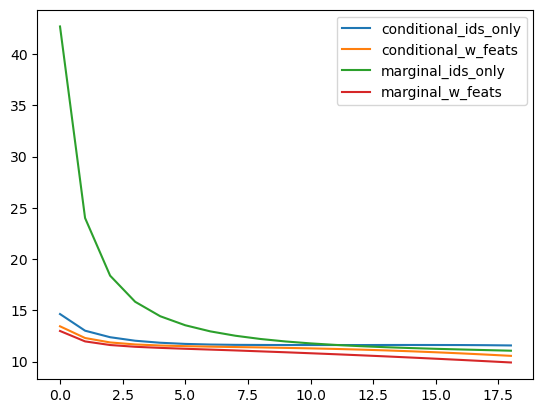

In [3]:
conditional_ids_only_train_loss = np.load('outputs/conditional_ids_only/train_loss_per_epoch.npy')[1:]
conditional_w_feats_loss = np.load('outputs/conditional_w_feats/train_loss_per_epoch.npy')[1:]
marginal_ids_only_train_loss = np.load('outputs/marginal_ids_only/train_loss_per_epoch.npy')[1:]
marginal_w_feats_loss = np.load('outputs/marginal_w_feats/train_loss_per_epoch.npy')[1:]

plt.plot(conditional_ids_only_train_loss, label='conditional_ids_only')
plt.plot(conditional_w_feats_loss, label='conditional_w_feats')
plt.plot(marginal_ids_only_train_loss, label='marginal_ids_only')
plt.plot(marginal_w_feats_loss, label='marginal_w_feats')
plt.legend()
plt.show()

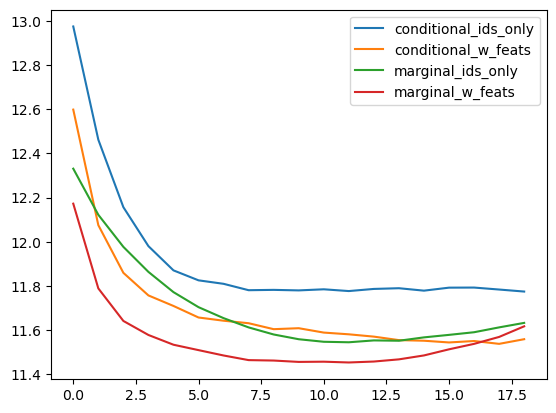

In [5]:
conditional_ids_only_loss = np.load('outputs/conditional_ids_only/test_loss_per_epoch.npy')[1:]
conditional_w_feats_loss = np.load('outputs/conditional_w_feats/test_loss_per_epoch.npy')[1:]
marginal_ids_only_loss = np.load('outputs/marginal_ids_only/test_loss_per_epoch.npy')[1:]
marginal_w_feats_loss = np.load('outputs/marginal_w_feats/test_loss_per_epoch.npy')[1:]

plt.plot(conditional_ids_only_loss, label='conditional_ids_only')
plt.plot(conditional_w_feats_loss, label='conditional_w_feats')
plt.plot(marginal_ids_only_loss, label='marginal_ids_only')
plt.plot(marginal_w_feats_loss, label='marginal_w_feats')
plt.legend()
plt.show()